In [1]:
# import necessary libraries

import numpy as np   # for data analysis
import pandas as pd   # for manipulating data and creating dataframes
import matplotlib.pyplot as plt   # for data visualization capabilities
import seaborn as sns # for more data visualization capabilities 

from sklearn.tree import DecisionTreeRegressor   # decision tree regressor algorithm
from sklearn.linear_model import LinearRegression   # linear regression algorithm 
from sklearn.model_selection import train_test_split   # to be used to partition data for proper testing
from sklearn.metrics import mean_squared_error   # to be used as an accuracy metric of models
from math import sqrt   # to carry out calculations

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/Seasons_Stats.csv'

In [4]:
df = pd.read_csv(path)
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [5]:
df.shape

(24691, 53)

In [6]:
df.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [7]:
df.isnull().sum(axis=0) # display each column (feature) and the number of NULL values inside it

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [8]:
# clean data
# for simplicity, drop unnecessary columns and those with more than 1000 Null values
df1 = df.drop(columns = ['Unnamed: 0','blanl', 'blank2', 'OBPM', 'DBPM', 'FTr', '3PAr', 'WS', 'WS/48', 'OWS', 'TS%', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%'])

In [9]:
df1.columns #display the remaining columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TRB%',
       'USG%', 'DWS', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
df1.shape

(24691, 36)

In [11]:
df2 = df1.dropna()


In [12]:
df2.isnull().sum(axis=0)

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TRB%      0
USG%      0
DWS       0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [13]:
df2.describe()

,Year,Age,G,GS,MP,PER,TRB%,USG%,DWS,BPM,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,...,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000
mean,2001.217552,26.853205,54.822969,27.036819,1325.934248,13.158210,9.214974,19.407995,1.318492,-1.606171,...,0.740429,63.602537,158.588961,222.191498,131.964004,45.148509,24.847720,82.448406,118.876448,563.163867
std,10.228267,3.984875,24.002467,29.445126,902.376067,4.655698,4.258255,4.830916,1.230116,3.552045,...,0.126347,65.502172,141.496216,200.649491,144.130440,38.251539,35.640312,66.511353,77.167180,485.488551
min,1980.000000,18.000000,1.000000,0.000000,5.000000,-23.000000,0.000000,4.200000,-1.000000,-29.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,24.000000,35.000000,1.000000,522.000000,10.400000,5.800000,16.100000,0.400000,-3.500000,...,0.682000,16.000000,50.000000,69.000000,32.000000,15.000000,4.000000,28.000000,52.000000,171.000000
50%,2002.000000,26.000000,61.000000,13.000000,1228.000000,13.100000,8.200000,19.100000,1.000000,-1.500000,...,0.758000,41.000000,123.000000,168.000000,84.000000,36.000000,12.000000,66.000000,114.000000,435.000000
75%,2010.000000,30.000000,77.000000,53.000000,2061.000000,15.800000,12.300000,22.400000,1.900000,0.600000,...,0.820000,91.000000,223.000000,312.000000,180.000000,65.000000,30.000000,122.000000,176.000000,839.000000
max,2017.000000,42.000000,85.000000,83.000000,3533.000000,40.200000,30.200000,56.200000,9.100000,34.800000,...,1.000000,558.000000,1007.000000,1530.000000,1164.000000,301.000000,397.000000,464.000000,386.000000,3041.000000


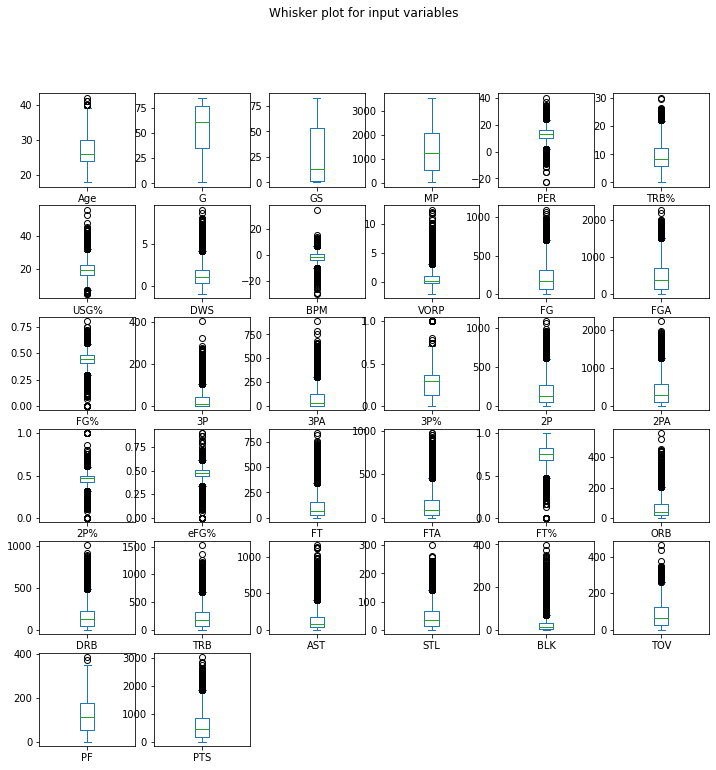

In [14]:
#Checking for outliers in the data
c= 'black'
df2.drop('Year', axis=1).plot(kind='box', 
                                subplots=True, layout=(6,6), 
                                sharex=False, sharey=False, 
                                figsize=(12,12), 
                                title='Whisker plot for input variables')
plt.show()

In [15]:
df2[df2.duplicated()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [16]:
# first 15 players with 3 point percentage greater than 40 %

df_3pt = df2.loc[df['3P%'] > .4, ['Player', '3P%', '3P', '3PA', 'Tm', 'Year']].sort_values(by='3P%', axis=0, ascending=True)
df_3pt.head(15)

,Player,3P%,3P,3PA,Tm,Year
22633,Jodie Meeks,0.401,162.0,404.0,LAL,2014.0
18935,Manu Ginobili,0.401,156.0,389.0,SAS,2008.0
22188,Klay Thompson,0.401,211.0,526.0,GSW,2013.0
23444,Hollis Thompson,0.401,115.0,287.0,PHI,2015.0
16841,Reggie Miller*,0.401,134.0,334.0,IND,2004.0
12861,Keith Askins,0.401,69.0,172.0,MIA,1997.0
16138,Derek Fisher,0.401,85.0,212.0,LAL,2003.0
23615,Darren Collison,0.401,87.0,217.0,SAC,2016.0
18794,Chauncey Billups,0.401,137.0,342.0,DET,2008.0
22562,Joe Johnson,0.401,162.0,404.0,BRK,2014.0


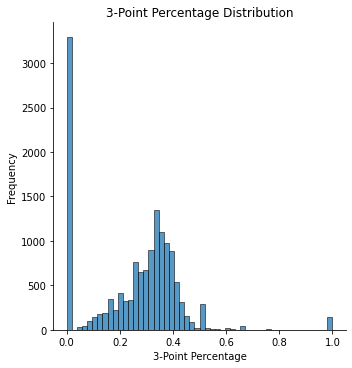

In [17]:
# continued data exploration with same visualization (histogram) as above but with respect to 3 point percentage this time.

data = df2['3P%']
sns.displot(data).set(title='3 Point Percentage Distribution')
plt.title('3-Point Percentage Distribution')
plt.xlabel('3-Point Percentage')
plt.ylabel('Frequency')
plt.show()

In [18]:
#& (df2['3PA'] > 100)

df2_3pt = df2.loc[(df2['Year'] > 1980) & (df2['3PA'] > 82), ['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TRB%',
       'USG%', 'DWS', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

df2_3pt.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6182,1981.0,Chris Ford,SG,32.0,BOS,82.0,75.0,2723.0,8.8,3.4,...,0.736,72.0,91.0,163.0,295.0,100.0,23.0,127.0,212.0,728.0
6475,1982.0,Mike Bratz,PG,26.0,SAS,81.0,3.0,1616.0,14.2,5.5,...,0.783,40.0,126.0,166.0,438.0,65.0,11.0,139.0,183.0,625.0
6492,1982.0,Don Buse,PG,31.0,IND,82.0,78.0,2529.0,14.8,4.8,...,0.813,46.0,177.0,223.0,407.0,164.0,27.0,95.0,176.0,797.0
6538,1982.0,Mike Dunleavy,SG,27.0,HOU,70.0,15.0,1315.0,13.2,4.4,...,0.708,24.0,80.0,104.0,227.0,45.0,3.0,80.0,161.0,520.0
6575,1982.0,Joe Hassett,SG,26.0,GSW,68.0,2.0,787.0,13.4,3.7,...,0.838,13.0,40.0,53.0,104.0,30.0,3.0,36.0,94.0,390.0
6670,1982.0,Kyle Macy,PG,24.0,PHO,82.0,72.0,2845.0,15.7,5.1,...,0.899,78.0,183.0,261.0,384.0,143.0,9.0,125.0,185.0,1163.0
6729,1982.0,Micheal Ray,PG,26.0,NYK,82.0,79.0,3044.0,17.7,10.6,...,0.700,177.0,388.0,565.0,572.0,213.0,41.0,291.0,317.0,1469.0
6767,1982.0,Reggie Theus,SG,24.0,CHI,82.0,82.0,2838.0,16.2,6.2,...,0.808,115.0,197.0,312.0,476.0,87.0,16.0,277.0,243.0,1508.0
6800,1982.0,Freeman Williams,SG,25.0,TOT,60.0,10.0,997.0,15.4,3.7,...,0.843,23.0,39.0,62.0,86.0,29.0,0.0,107.0,103.0,720.0
6809,1982.0,Brian Winters,SG,29.0,MIL,61.0,13.0,1829.0,15.8,5.3,...,0.788,51.0,119.0,170.0,253.0,57.0,9.0,118.0,187.0,967.0


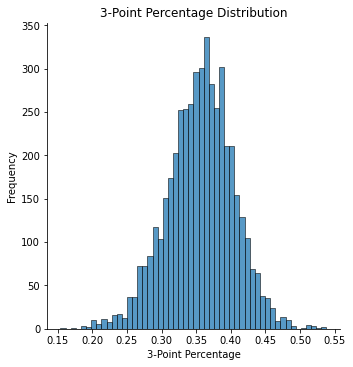

In [19]:
data = df2_3pt['3P%']
sns.displot(data).set(title='3 Point Percentage Distribution')
plt.title('3-Point Percentage Distribution')
plt.xlabel('3-Point Percentage')
plt.ylabel('Frequency')
plt.show()

In [20]:
df2['2P%'].mean()

0.4615946520397669

In [21]:
df2['FG%'].mean()

0.4386246828933836

In [22]:
df2_3pt['3P%'].mean()

0.3556143667296786

In [30]:
# first 15 players with 3 point percentage greater than 50%

df_shoot = df2.loc[(df2['3P%'] > .4) & (df2['Year'] == 2017) & (df2['3PA'] > 200), ['Player', 
'3P%', '3P', '3PA', 'Tm', 'Year']].sort_values(by='3P%', axis=0, ascending=False)
df_shoot.head(15)
df_shoot.shape

(26, 6)

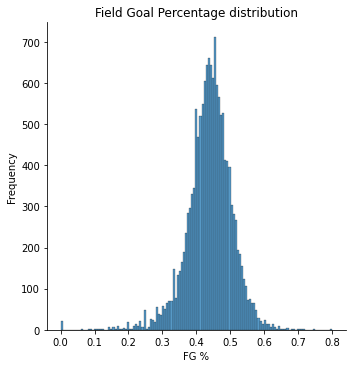

In [24]:
# will begin exploring data by graphing the field goal percentage distribution across the entire data set

data = df2['FG%']
sns.displot(data).set(title='Age Distribution')   # define graph
plt.title('Field Goal Percentage distribution')   # set title
plt.xlabel('FG %')   # set x label
plt.ylabel('Frequency')   # set y label
plt.show()

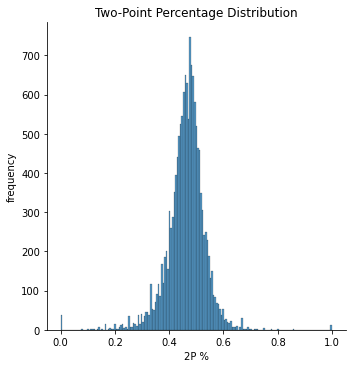

In [25]:
data = df2['2P%']
sns.displot(data).set(title='Two-Point Percentage Distribution')   # define graph
plt.title('Two-Point Percentage Distribution')   # set title
plt.xlabel('2P %')   # set x label
plt.ylabel('frequency')   # set y label
plt.show()

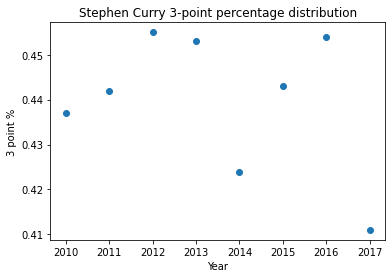

,Player,3P%,3P,3PA,Tm,Year
21236,Stephen Curry,0.455,55.0,121.0,GSW,2012.0
23633,Stephen Curry,0.454,402.0,886.0,GSW,2016.0
21798,Stephen Curry,0.453,272.0,600.0,GSW,2013.0
23000,Stephen Curry,0.443,286.0,646.0,GSW,2015.0
20654,Stephen Curry,0.442,151.0,342.0,GSW,2011.0
20042,Stephen Curry,0.437,166.0,380.0,GSW,2010.0
22402,Stephen Curry,0.424,261.0,615.0,GSW,2014.0
24216,Stephen Curry,0.411,324.0,789.0,GSW,2017.0


In [26]:
# player profile 3 point percentage Stephen Curry.
# descending from best to worst percentage throughout seasons
# scatterplot for 3 point percentage throughout years

chef_curry = df.loc[df['Player'] == 'Stephen Curry']
plt.scatter(chef_curry['Year'], chef_curry['3P%'])
plt.title('Stephen Curry 3-point percentage distribution')
plt.xlabel('Year')
plt.ylabel('3 point %')
plt.show()

df2.loc[df2['Player'] == 'Stephen Curry', ['Player', '3P%', '3P', '3PA', 'Tm', 'Year']].sort_values('3P%', ascending = False)

In [27]:
df3 = df2.groupby(['Year'])['Year','3PA'].agg('mean')
df3

<ipython-input-27-0c736c30768c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby(['Year'])['Year','3PA'].agg('mean')


,Year,3PA
Year,,
1980.0,1980.0,39.727273
1981.0,1981.0,21.416667
1982.0,1982.0,15.941781
1983.0,1983.0,14.642173
1984.0,1984.0,17.756757
1985.0,1985.0,21.600719
1986.0,1986.0,22.623729
1987.0,1987.0,30.672241
1988.0,1988.0,32.116766


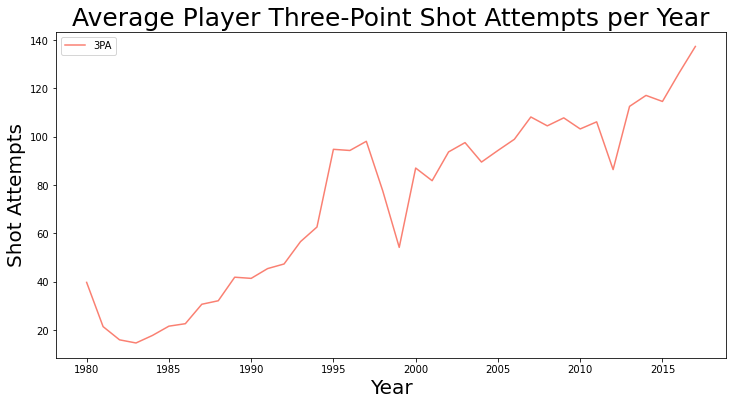

In [28]:
df3.plot(x="Year", y=["3PA"], figsize = (12,6), color = 'salmon')
plt.title('Average Player Three-Point Shot Attempts per Year', fontsize= 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Shot Attempts', fontsize = 20)
plt.show()

In [31]:
df4 = df2.groupby(['Year'])['Year','3PA', '2PA', 'FGA'].agg('mean')
df4.head(20)

<ipython-input-31-5735b0232837>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df2.groupby(['Year'])['Year','3PA', '2PA', 'FGA'].agg('mean')


,Year,3PA,2PA,FGA
Year,,,,
1980.0,1980.0,39.727273,599.090909,638.818182
1981.0,1981.0,21.416667,583.083333,604.500000
1982.0,1982.0,15.941781,542.787671,558.729452
1983.0,1983.0,14.642173,538.616613,553.258786
1984.0,1984.0,17.756757,584.277992,602.034749
1985.0,1985.0,21.600719,537.758993,559.359712
1986.0,1986.0,22.623729,521.000000,543.623729
1987.0,1987.0,30.672241,509.531773,540.204013
1988.0,1988.0,32.116766,474.712575,506.829341


In [32]:
df4['Percent 3PA'] = df4['3PA']/df4['FGA']*100
df4['Percent 2PA'] = df4['2PA']/df4['FGA']*100


df4.head(20)

,Year,3PA,2PA,FGA,Percent 3PA,Percent 2PA
Year,,,,,,
1980.0,1980.0,39.727273,599.090909,638.818182,6.218870,93.781130
1981.0,1981.0,21.416667,583.083333,604.500000,3.542873,96.457127
1982.0,1982.0,15.941781,542.787671,558.729452,2.853220,97.146780
1983.0,1983.0,14.642173,538.616613,553.258786,2.646532,97.353468
1984.0,1984.0,17.756757,584.277992,602.034749,2.949457,97.050543
1985.0,1985.0,21.600719,537.758993,559.359712,3.861687,96.138313
1986.0,1986.0,22.623729,521.000000,543.623729,4.161652,95.838348
1987.0,1987.0,30.672241,509.531773,540.204013,5.677899,94.322101
1988.0,1988.0,32.116766,474.712575,506.829341,6.336801,93.663199


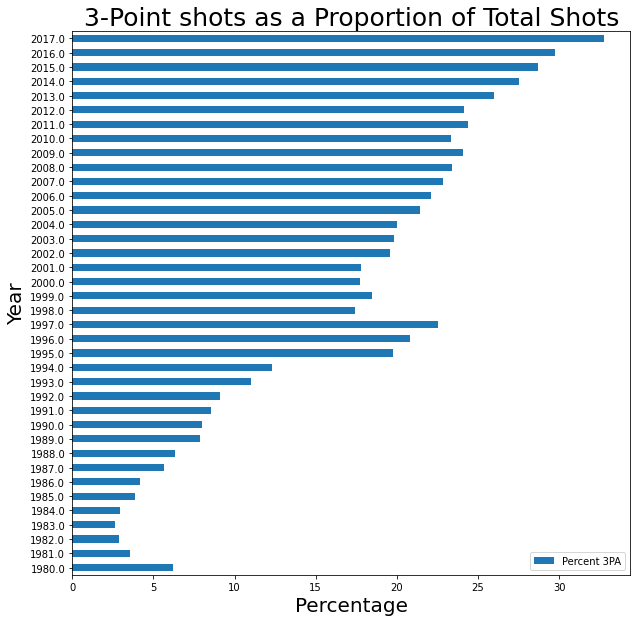

In [33]:
df4.plot.barh(x="Year", y=["Percent 3PA"], figsize = (10,10))
plt.title('3-Point shots as a Proportion of Total Shots', fontsize= 25)
plt.xlabel('Percentage', fontsize = 20)
plt.ylabel('Year', fontsize = 20)
plt.show()

In [34]:
df5 = df2.loc[df['Year'] == 2017, ['Player', 'Pos', '3P%', '3P', '3PA', 'Tm', 'Year']].sort_values(by='3PA', axis=0, ascending=False)
df5.head(15)

,Player,Pos,3P%,3P,3PA,Tm,Year
24216,Stephen Curry,PG,0.411,324.0,789.0,GSW,2017.0
24306,James Harden,PG,0.347,262.0,756.0,HOU,2017.0
24290,Eric Gordon,SG,0.372,246.0,661.0,HOU,2017.0
24617,Klay Thompson,SG,0.414,268.0,647.0,GSW,2017.0
24612,Isaiah Thomas,PG,0.379,245.0,646.0,BOS,2017.0
24645,Kemba Walker,PG,0.399,240.0,602.0,CHO,2017.0
24654,Russell Westbrook,PG,0.343,200.0,583.0,OKC,2017.0
24421,Damian Lillard,PG,0.370,214.0,578.0,POR,2017.0
24118,Trevor Ariza,SF,0.344,191.0,555.0,HOU,2017.0
24137,Bradley Beal,SG,0.404,223.0,552.0,WAS,2017.0


In [35]:
df6 = df5.groupby(['Pos'])['Pos','3PA'].agg('mean')
df6

<ipython-input-35-d62377e1d648>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6 = df5.groupby(['Pos'])['Pos','3PA'].agg('mean')


,3PA
Pos,
C,61.932432
PF,104.277778
PF-C,98.000000
PG,149.254386
SF,160.428571
SG,180.581967


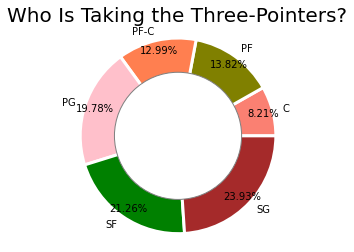

In [36]:
#plt.figure(figsize=(10, 10)) # change the size of a figure
# The slices will be ordered and plotted counter-clockwise.
plt.title('Who Is Taking the Three-Pointers?', fontsize= 20)
labels = df6.index
sizes = df6['3PA']
colors = ['Salmon','olive','coral', 'pink', 'green', 'brown'] #define colors of three donut pieces
explode = (0, 0, 0, 0, 0, 0) # explode a slice if required
textprops = {'fontsize':10, 'color':'black'} # Font size of text in donut chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 autopct='%.2f%%', # Show data in 0.00%
 pctdistance =0.9,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

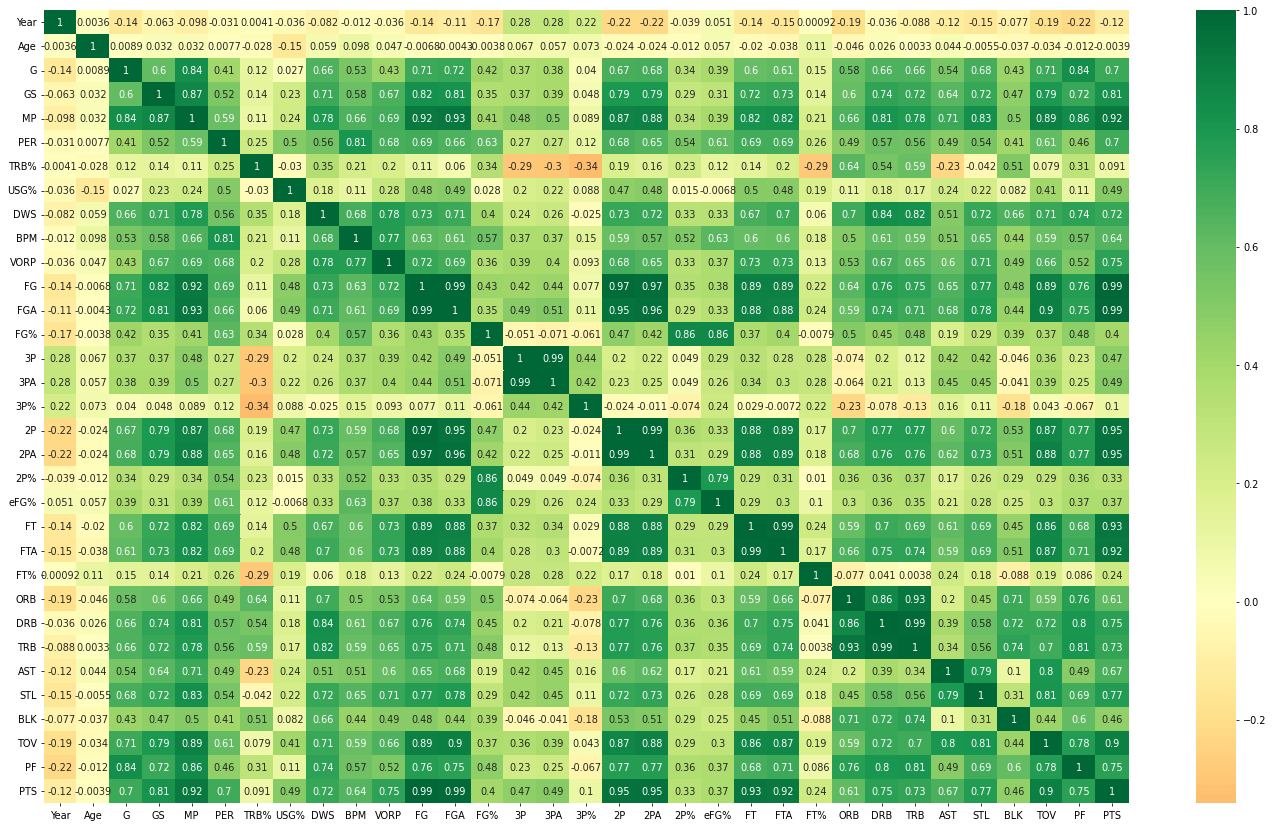

In [37]:
plt.figure(figsize=(25,15), dpi= 70) #correlation map
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [39]:
df2[df2.columns[1:]].corr()['3P%'][:].sort_values(ascending=False).to_frame()

,3P%
3P%,1.000000
3P,0.437137
3PA,0.420097
eFG%,0.244618
FT%,0.218403
AST,0.161282
BPM,0.154114
PER,0.116582
FGA,0.111849
STL,0.109210


### Linear Regression Model


In [40]:
df2_3pt.shape

(4761, 36)

In [41]:
features = ['PTS', 'TOV', 'STL', 'FT%', '3P', 'AST','PER', 'BPM', 'MP', 'eFG%']   # define features 
target = ['3P%']   # define target 

In [42]:
#X = df2[features]
#y = df2[target]
X = df2_3pt[features]
y = df2_3pt[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 300)   # partition data

# checking the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3189, 10)
Shape of y_train : (3189, 1)
Shape of x_test : (1572, 10)
Shape of y_test : (1572, 1)


In [44]:
regressor = LinearRegression()   
regressor.fit(X_train, y_train)   # model data using Linear Regression

LinearRegression()

In [45]:
y_prediction = regressor.predict(X_test)   # test data on test sample
y_prediction

array([[0.32047306],
       [0.42403145],
       [0.3182668 ],
       ...,
       [0.36721977],
       [0.39300029],
       [0.36372313]])

In [46]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))   # evaluate model performance 
print(RMSE)

0.031196237770285552


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.5640283639259505

In [48]:
y_pred = pd.DataFrame(y_prediction, columns = ['Prediction'])    # display predictions

test_values = pd.DataFrame(y_test)   # actual freethrow percentages

test_values['index'] = range(0,1572)
y_pred['index'] = range(0,1572)

side_by_side0 = pd.merge(test_values, y_pred, how='left', on='index')   # comparison of actual to predicted values 

del side_by_side0['index']
del y_pred['index']
del y_test['index']


side_by_side0.head(16)

,3P%,Prediction
0,0.360,0.320473
1,0.466,0.424031
2,0.309,0.318267
3,0.361,0.381196
4,0.326,0.332667
5,0.379,0.351366
6,0.440,0.422882
7,0.337,0.356929
8,0.350,0.357329
9,0.383,0.343771


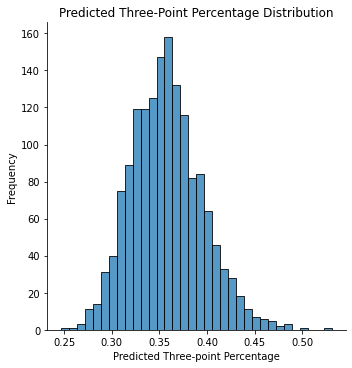

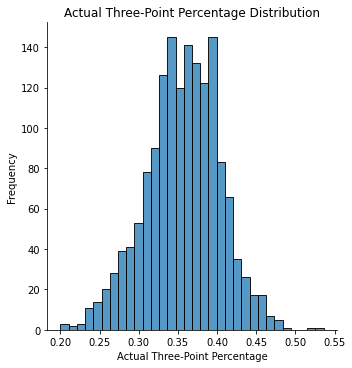

In [49]:
data = side_by_side0['Prediction']
sns.displot(data)   # visualization of predicted values
plt.title('Predicted Three-Point Percentage Distribution')
plt.xlabel('Predicted Three-point Percentage')
plt.ylabel('Frequency')
plt.show()

data = side_by_side0['3P%']
sns.displot(data)  # visualization of predicted values
plt.title('Actual Three-Point Percentage Distribution')
plt.xlabel('Actual Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

In [50]:
side_by_side0.describe()

,3P%,Prediction
count,1572.000000,1572.000000
mean,0.356225,0.357480
std,0.047262,0.037521
min,0.200000,0.246337
25%,0.327000,0.330645
50%,0.358000,0.355993
75%,0.389000,0.380350
max,0.536000,0.531377


In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state =0)
regressor.fit(X_train, y_train)   # model data using random forest regression

<ipython-input-51-aff55a18c56d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)   # model data using random forest regression


RandomForestRegressor(n_estimators=10, random_state=0)

In [52]:
y_prediction1 = regressor.predict(X_test)   # test data on test sample
y_prediction1

array([0.3037, 0.4135, 0.3234, ..., 0.3667, 0.4005, 0.3918])

In [53]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction1))   # evaluate model performance 
print(RMSE)

0.030134095873224607


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction1)

0.5932101358899962

In [55]:
y_prediction1 = pd.DataFrame(y_prediction1, columns = ['Prediction'])

test_values['index'] = range(0,1572)
y_prediction1['index'] = range(0,1572)

side_by_side = pd.merge(test_values, y_prediction1, how='left', on='index')   # comparison of actual to predicted values 

del side_by_side['index']
del y_prediction1['index']
#del y_test['index']


side_by_side.head(16)

,3P%,Prediction
0,0.360,0.3037
1,0.466,0.4135
2,0.309,0.3234
3,0.361,0.3594
4,0.326,0.3467
5,0.379,0.3443
6,0.440,0.4333
7,0.337,0.3420
8,0.350,0.3726
9,0.383,0.3644


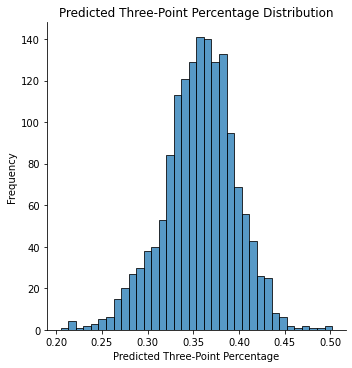

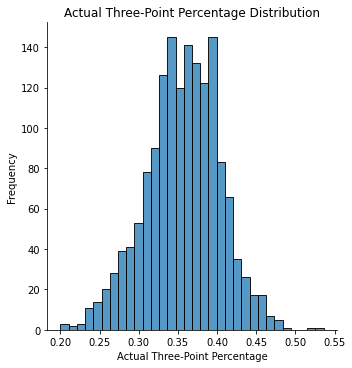

In [56]:
pre = side_by_side['Prediction']
sns.displot(pre)  # visualization of predicted values
plt.title('Predicted Three-Point Percentage Distribution')
plt.xlabel('Predicted Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

actual = side_by_side['3P%']
sns.displot(actual)  # visualization of actual values
plt.title('Actual Three-Point Percentage Distribution')
plt.xlabel('Actual Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

In [57]:
side_by_side.describe()

,3P%,Prediction
count,1572.000000,1572.000000
mean,0.356225,0.356953
std,0.047262,0.039638
min,0.200000,0.205000
25%,0.327000,0.333875
50%,0.358000,0.358700
75%,0.389000,0.382700
max,0.536000,0.501800
